In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import csv
import json
import requests
import bs4
from bs4 import BeautifulSoup as BS

In [3]:
def fetchmovie(ystart,yend):
    """
    Scrapes IMDB list of movie titles and parse out the Movie title and Year
    of top 150 movie titles of that year
    
    Return a list of tuples EXAMPLE :  [('TITLE', 'YEAR'),('TITLE2','YEAR2')]
    """
    lst = []
    for num in range(ystart,yend):
        link = requests.get(f'https://www.imdb.com/search/title/?year={num}&title_type=feature&').text
        soup = BS(link,'html.parser')
        h3 = soup.findAll('h3',class_='lister-item-header')
        
        for item in h3:
            x = (item.text.strip())
            lst.append(x[3:-6] + x[-6:])
    
        lst = [i.replace('\n',"") for i in lst]
        
    #run again for page 2     
    for num in range(ystart,yend):
        link = requests.get(f'https://www.imdb.com/search/title/?title_type=feature&year={num}-01-01,{num}-12-31&start=51&ref_=adv_nxt').text
        soup = BS(link,'html.parser')
        h3 = soup.findAll('h3',class_='lister-item-header')
        
        for item in h3:
            x = (item.text.strip())
            lst.append(x[3:-6] + x[-6:])

        lst = [i.replace('\n',"") for i in lst]
    
    #repeat for page 3
    for num in range(ystart,yend):
        link = requests.get(f'https://www.imdb.com/search/title/?title_type=feature&year={num}-01-01,{num}-12-31&start=101&ref_=adv_nxt').text
        soup = BS(link,'html.parser')
        h3 = soup.findAll('h3',class_='lister-item-header')
        
        for item in h3:
            x = (item.text.strip())
            lst.append(x[4:-6] + x[-6:])

        lst = [i.replace('\n',"") for i in lst]
        
    nxt = [(movie[:-6],movie[-5:-1]) for movie in lst]
    return nxt

In [4]:
#data = fetchmovie(Year start, Year end-1)
data = fetchmovie(1990,2020)


In [5]:
#small sample test to see results
fetchmovie(2015,2017)

[('Mad Max: Fury Road', '2015'),
 ('Love(II) ', '2015'),
 ('Avengers: Age of Ultron', '2015'),
 ('Fifty Shades of Grey', '2015'),
 ('Spectre(I) ', '2015'),
 ('The Revenant', '2015'),
 ('The Big Short', '2015'),
 ('The VVitch: A New-England Folktale', '2015'),
 ('Room(I) ', '2015'),
 ('Sicario', '2015'),
 ('The Hateful Eight', '2015'),
 ('Star Wars: Episode VII - The Force Awakens', '2015'),
 ('The Martian', '2015'),
 ('Inside Out(I) ', '2015'),
 ('Focus(II) ', '2015'),
 ('Jurassic World', '2015'),
 ('Ant-Man', '2015'),
 ('The Man from U.N.C.L.E.', '2015'),
 ('The Invitation(I) ', '2015'),
 ('Cinderella(I) ', '2015'),
 ('The Lobster', '2015'),
 ('Spotlight(I) ', '2015'),
 ('Knock Knock(I) ', '2015'),
 ('Legend(I) ', '2015'),
 ('Furious 7', '2015'),
 ('The Gift(VI) ', '2015'),
 ('Fantastic Four', '2015'),
 ('San Andreas', '2015'),
 ('Jupiter Ascending', '2015'),
 ('Mission: Impossible - Rogue Nation', '2015'),
 ('Pan', '2015'),
 ('The Hunger Games: Mockingjay - Part 2', '2015'),
 ('Vacat

In [8]:
## Unnecessary step to output the data into CSV then calling its back,
## but did it for practice


#Writes the output into a CSV file
with open('data/IMDB_Titles.csv','w') as out:
    csv_out=csv.writer(out)
    for row in data:
        csv_out.writerow(row)

        
#reading the CSV file
IMDB_Titles = pd.read_csv('IMDB_Titles.csv')

#4499 movie titles collected from scraping IMDB with year of release
len(IMDB_Titles)

4499

## API KEY and Test

In [9]:
def get_keys(path):
    """
    Open a directory and returning a readable json
    """
    with open(path) as f:
        return json.load(f)

In [10]:
file = get_keys("/Users/jaden/.secret/yelp_api.json")
api_key = file['tmdb_key']

In [11]:
resp = requests.get(f'https://api.themoviedb.org/3/movie/76341?api_key={api_key}')

#Returns True if successfully connected
resp.status_code == requests.codes.ok

True

## TMDB API
Using the previous data that was collected( Movie Title, Year), passing this info to the TMDB API to recieve the unique Movie ID 

In [12]:
def searchmovie(title,year):
    """
    Takes 2 arguements(title of movie, year of release) will return a tuple
    of the Title of Movie and its TMDB ID (IF FOUND) 
    """
    params = {'api_key': api_key,
             'query' :title,
             'year':year}
    response = requests.get(f'https://api.themoviedb.org/3/search/movie', params = params)
    if response.ok:
        try:
            content = json.loads(response.content)
            movie_title = content['results'][0]['title']
            movie_id = content['results'][0]['id']
            print(f'Found {movie_title} with ID {movie_id}')
            return movie_id,movie_title
        except:
            return None
    else:
        print("Bad Response")
        print(response.content)
        return None

In [13]:
#Testing Function
searchmovie("How to Train Your Dragon",'2010')

Found How to Train Your Dragon with ID 10191


(10191, 'How to Train Your Dragon')

In [14]:
#Passing movie_title and year into the function searchmovie() then appending
#to a list 

# for num in range(len(movies_list)):
ids_lst = []
for num in range(len(data)):
    ids_lst.append(searchmovie(data[num][0],data[num][1]))

Found GoodFellas with ID 769
Found Pretty Woman with ID 114
Found The Godfather: Part III with ID 242
Found Total Recall with ID 861
Found Edward Scissorhands with ID 162
Found Home Alone with ID 771
Found Dances with Wolves with ID 581
Found Misery with ID 1700
Found Teenage Mutant Ninja Turtles with ID 1498
Found Ghost with ID 251
Found Tremors with ID 9362
Found The Hunt for Red October with ID 1669
Found Back to the Future Part III with ID 196
Found Dick Tracy with ID 8592
Found Cry-Baby with ID 9768
Found Awakenings with ID 11005
Found Die Hard 2 with ID 1573
Found Wild at Heart with ID 483
Found Days of Thunder with ID 2119
Found Kindergarten Cop with ID 951
Found Troll 2 with ID 26914
Found The Handmaid's Tale with ID 20815
Found Quigley Down Under with ID 9588
Found Presumed Innocent with ID 11092
Found Miller's Crossing with ID 379
Found The Witches with ID 10166
Found Predator 2 with ID 169
Found Darkman with ID 9556
Found 3 Men and a Little Lady with ID 11630
Found Memphis B

Found Ed Wood with ID 522
Found Major League II with ID 11067
Found Star Trek: Generations with ID 193
Found Color of Night with ID 2124
Found Baby's Day Out with ID 11212
Found Heavenly Creatures with ID 1024
Found Wolf with ID 10395
Found Blank Check with ID 13962
Found War of the Buttons with ID 38348
Found Pom Poko with ID 15283
Found Disclosure with ID 8984
Found Only You with ID 9058
Found Angels in the Outfield with ID 24795
Found Three Colors: Red with ID 110
Found The Adventures of Priscilla, Queen of the Desert with ID 2759
Found My Girl 2 with ID 11317
Found Maverick with ID 9359
Found The Jungle Book with ID 10714
Found Se7en with ID 807
Found Jumanji with ID 8844
Found Outbreak with ID 6950
Found Bad Boys with ID 9737
Found Twelve Monkeys with ID 63
Found The Usual Suspects with ID 629
Found Mortal Kombat with ID 9312
Found Clueless with ID 9603
Found Braveheart with ID 197
Found Heat with ID 949
Found GoldenEye with ID 710
Found Toy Story with ID 862
Found Casino with ID 

Found Any Given Sunday with ID 9563
Found Audition with ID 11075
Found Never Been Kissed with ID 11355
Found Deep Blue Sea with ID 8914
Found The Thomas Crown Affair with ID 913
Found Mansfield Park with ID 10399
Found Wild Wild West with ID 8487
Found Blast from the Past with ID 11622
Found The Bone Collector with ID 9481
Found The Iron Giant with ID 10386
Found The Blair Witch Project with ID 2667
Found The Straight Story with ID 404
Found Bicentennial Man with ID 2277
Found The Insider with ID 9008
Found Election with ID 9451
Found Three Kings with ID 6415
Found Mystery Men with ID 9824
Found Boys Don't Cry with ID 226
Found Gladiator with ID 98
Found Requiem for a Dream with ID 641
Found American Psycho with ID 1359
Found Snatch with ID 107
Found Memento with ID 77
Found Cast Away with ID 8358
Found X-Men: The Mutant Watch with ID 447399
Found The Patriot with ID 2024
Found Malena with ID 10867
Found Sexy Beast with ID 11826
Found Almost Famous with ID 786
Found Remember the Titans

Found Napoleon Dynamite with ID 8193
Found The Machinist with ID 4553
Found The Aviator with ID 2567
Found The Day After Tomorrow with ID 435
Found Kill Bill: Vol. 2 with ID 393
Found The Butterfly Effect with ID 1954
Found Million Dollar Baby with ID 70
Found Van Helsing with ID 7131
Found 50 First Dates with ID 1824
Found Resident Evil: Apocalypse with ID 1577
Found The Terminal with ID 594
Found Lemony Snicket's A Series of Unfortunate Events with ID 11774
Found The Girl Next Door with ID 10591
Found Saw with ID 176
Found Dawn of the Dead with ID 924
Found Collateral with ID 1538
Found EuroTrip with ID 9352
Found Man on Fire with ID 9509
Found 9 Songs with ID 27
Found 13 Going on 30 with ID 10096
Found The Bourne Supremacy with ID 2502
Found King Arthur with ID 9477
Found The Chronicles of Riddick with ID 2789
Found Layer Cake with ID 4836
Found Anchorman: The Legend of Ron Burgundy with ID 8699
Found The Punisher with ID 7220
Found The Village with ID 6947
Found Before Sunset with 

Found Watchmen with ID 13183
Found The Lovely Bones with ID 7980
Found Sherlock Holmes with ID 10528
Found Zombieland with ID 19908
Found He's Just Not That Into You with ID 10184
Found Up with ID 14160
Found 3 Idiots with ID 20453
Found The Secret in Their Eyes with ID 25376
Found X-Men Origins: Wolverine with ID 2080
Found 17 Again with ID 16996
Found The Princess and the Frog with ID 10198
Found The Twilight Saga: New Moon with ID 18239
Found The Blind Side with ID 22881
Found The Human Centipede (First Sequence) with ID 37169
Found Moon with ID 17431
Found District 9 with ID 17654
Found The Invention of Lying with ID 23082
Found Dogtooth with ID 38810
Found Mother and Child with ID 37080
Found Fast & Furious with ID 13804
Found Night at the Museum: Battle of the Smithsonian with ID 18360
Found Public Enemies with ID 11322
Found (500) Days of Summer with ID 19913
Found Mr. Nobody with ID 31011
Found Angels & Demons with ID 13448
Found The Girl with the Dragon Tattoo with ID 15472
Fo

Found What We Do in the Shadows with ID 246741
Found John Wick with ID 245891
Found The Grand Budapest Hotel with ID 120467
Found Whiplash with ID 244786
Found Captain America: The Winter Soldier with ID 100402
Found Divergent with ID 157350
Found Birdman or (The Unexpected Virtue of Ignorance) with ID 194662
Found Blended with ID 232672
Found The Hobbit: The Battle of the Five Armies with ID 122917
Found Fury with ID 228150
Found The Equalizer with ID 156022
Found The Imitation Game with ID 205596
Found Edge of Tomorrow with ID 137113
Found Nightcrawler with ID 242582
Found Exodus: Gods and Kings with ID 147441
Found American Sniper with ID 190859
Found The Homesman with ID 264656
Found The Theory of Everything with ID 266856
Found X-Men: Days of Future Past with ID 127585
Found Noah with ID 86834
Found Big Hero 6 with ID 177572
Found The Fault in Our Stars with ID 222935
Found The Maze Runner with ID 198663
Found Predestination with ID 206487
Found Love, Rosie with ID 200727
Found Wi

Found 1917 with ID 530915
Found Little Women with ID 331482
Found Star Wars: The Rise of Skywalker with ID 181812
Found Avengers: Endgame with ID 299534
Found Joker with ID 475557
Found Jumanji: The Next Level with ID 512200
Found Angel Has Fallen with ID 423204
Found Jojo Rabbit with ID 515001
Found Midsommar with ID 530385
Found Uncut Gems with ID 473033
Found It Chapter Two with ID 474350
Found Miracle in Cell No. 7 with ID 637920
Found Ford v Ferrari with ID 359724
Found The Irishman with ID 398978
Found Spider-Man: Far from Home with ID 429617
Found The Lion King with ID 420818
Found Frozen II with ID 330457
Found Cats with ID 536869
Found The Lighthouse with ID 503919
Found Bombshell with ID 525661
Found We Summon the Darkness with ID 546724
Found Aladdin with ID 420817
Found 6 Underground with ID 509967
Found Sea Fever with ID 507441
Found Doctor Sleep with ID 501170
Found Vivarium with ID 458305
Found Ip Man 4: The Finale with ID 449924
Found Hustlers with ID 540901
Found Just 

Found Sniper with ID 9545
Found National Lampoon's Loaded Weapon 1 with ID 9644
Found Manhattan Murder Mystery with ID 10440
Found Farewell My Concubine with ID 10997
Found What's Love Got to Do with It with ID 15765
Found Tammy and the T-Rex with ID 55563
Found The Specialist with ID 2636
Found Reality Bites with ID 2788
Found Frankenstein with ID 3036
Found The Search for One-eye Jimmy with ID 67365
Found The Hudsucker Proxy with ID 11934
Found Quiz Show with ID 11450
Found Beverly Hills Cop III with ID 306
Found Sirens with ID 12519
Found The Last Seduction with ID 25284
Found China Moon with ID 26337
Found New Nightmare with ID 11596
Found The Client with ID 10731
Found Shallow Grave with ID 9905
Found The Pagemaster with ID 15139
Found Three Colors: White with ID 109
Found The Next Karate Kid with ID 11231
Found Nobody's Fool with ID 11593
Found Don Juan DeMarco with ID 1909
Found Once Were Warriors with ID 527
Found Iron Will with ID 24767
Found Exotica with ID 20156
Found The Sa

Found Hope Floats with ID 9715
Found I Still Know What You Did Last Summer with ID 3600
Found SLC Punk with ID 6396
Found Ringu with ID 2671
Found The Legend of 1900 with ID 10376
Found The X Files with ID 846
Found BASEketball with ID 14013
Found Mighty Joe Young with ID 9822
Found Disturbing Behavior with ID 9424
Found Twilight with ID 26269
Found Species II with ID 10216
Found The Interview with ID 19846
Found Dangerous Beauty with ID 8583
Found The Celebration with ID 309
Found Major League: Back to the Minors with ID 9771
Found Black Cat, White Cat with ID 1075
Found The 13th Warrior with ID 1911
Found Analyze This with ID 9535
Found Stuart Little with ID 10137
Found The Haunting with ID 11618
Found Drop Dead Gorgeous with ID 10490
Found October Sky with ID 13466
Found End of Days with ID 9946
Found Man on the Moon with ID 1850
Found Double Jeopardy with ID 10398
Found All About My Mother with ID 99
Found The End of the Affair with ID 20024
Found Jawbreaker with ID 18892
Found Bri

Found Daddy Day Care with ID 10708
Found The Lizzie McGuire Movie with ID 18736
Found Looney Tunes: Back in Action with ID 10715
Found Swimming Pool with ID 302
Found Spring, Summer, Fall, Winter... and Spring with ID 113
Found Girl with a Pearl Earring with ID 3635
Found The Haunted Mansion with ID 10756
Found Elephant with ID 1807
Found The Life of David Gale with ID 11615
Found Agent Cody Banks with ID 10923
Found House of Sand and Fog with ID 11093
Found Johnny English with ID 9486
Found Seabiscuit with ID 4464
Found Sinbad: Legend of the Seven Seas with ID 14411
Found Gigli with ID 8046
Found Matchstick Men with ID 7270
Found Paycheck with ID 9620
Found Runaway Jury with ID 11329
Found Honey with ID 10028
Found Coffee and Cigarettes with ID 883
Found Gothika with ID 4970
Found The Lord of the Rings: The Return of the King with ID 122
Found The Recruit with ID 1647
Found I, Robot with ID 2048
Found Harold & Kumar Go to White Castle with ID 11282
Found Sideways with ID 9675
Found A 

Found Sex and the City with ID 4564
Found Jumper with ID 8247
Found Eagle Eye with ID 13027
Found The Duchess with ID 12783
Found The Chaser with ID 13855
Found Madagascar: Escape 2 Africa with ID 10527
Found Happy-Go-Lucky with ID 10503
Found The Forbidden Kingdom with ID 1729
Found The Day the Earth Stood Still with ID 10200
Found 10,000 BC with ID 7840
Found Eden Lake with ID 13510
Found Star Wars: The Clone Wars with ID 12180
Found Hellboy II: The Golden Army with ID 11253
Found Definitely, Maybe with ID 8390
Found Role Models with ID 15373
Found Made of Honor with ID 10761
Found Doomsday with ID 13460
Found Horton Hears a Who! with ID 12222
Found Australia with ID 6972
Found Speed Racer with ID 7459
Found Outlander with ID 10529
Found Punisher: War Zone with ID 13056
Found Repo! The Genetic Opera with ID 14353
Found Frost/Nixon with ID 11499
Found Bedtime Stories with ID 10202
Found 27 Dresses with ID 6557
Found The Good, The Bad, The Weird with ID 15067
Found Righteous Kill with 

Found Saving Mr. Banks with ID 140823
Found Parker with ID 119283
Found Texas Chainsaw 3D with ID 76617
Found The Spectacular Now with ID 157386
Found Pain & Gain with ID 134374
Found RED 2 with ID 146216
Found The Hangover Part III with ID 109439
Found Oldboy with ID 87516
Found G.I. Joe: Retaliation with ID 72559
Found The World's End with ID 107985
Found Before Midnight with ID 132344
Found The Wind Rises with ID 149870
Found The Way Way Back with ID 147773
Found The Host with ID 72710
Found Kick-Ass 2 with ID 59859
Found The Grandmaster with ID 44865
Found Only Lovers Left Alive with ID 152603
Found Escape Plan with ID 107846
Found Horns with ID 149509
Found Out of the Furnace with ID 164457
Found Carrie with ID 133805
Found Nymphomaniac: Vol. II with ID 249397
Found The Great Beauty with ID 179144
Found Gangster Squad with ID 82682
Found A Good Day to Die Hard with ID 47964
Found Adore with ID 111190
Found Riddick with ID 87421
Found 2 Guns with ID 136400
Found The Croods with ID 

Found To All the Boys I've Loved Before with ID 466282
Found Hotel Mumbai with ID 416144
Found Overboard with ID 454619
Found Hunter Killer with ID 399402
Found How It Ends with ID 475210
Found Mile 22 with ID 347375
Found Widows with ID 401469
Found Mortal Engines with ID 428078
Found Smallfoot with ID 446894
Found Wildling with ID 362826
Found High Life with ID 376865
Found The VelociPastor with ID 457712
Found The Equalizer 2 with ID 345887
Found Maze Runner: The Death Cure with ID 336843
Found Rampage with ID 427641
Found The Girl in the Spider's Web with ID 446807
Found Peppermint with ID 458594
Found mid90s with ID 437586
Found Under the Silver Lake with ID 396461
Found Apostle with ID 424121
Found The Nun with ID 439079
Found Prospect with ID 506072
Found Andhadhun with ID 534780
Found Outlaw King with ID 454227
Found Isle of Dogs with ID 399174
Found Leave No Trace with ID 443463
Found Captain Marvel with ID 299537
Found Honey Boy with ID 512263
Found Pokémon Detective Pikachu 

Found Romeo Is Bleeding with ID 2088
Found Look Who's Talking Now! with ID 11982
Found Silent Tongue with ID 143547
Found Little Buddha with ID 1689
Found Heaven & Earth with ID 31642
Found The Program with ID 18133
Found Nowhere to Run with ID 10413
Found We're Back! A Dinosaur's Story with ID 18890
Found Snapdragon with ID 41128
Found CB4 with ID 15278
Found Dream Lover with ID 18190
Found Surf Ninjas with ID 23470
Found Matinee with ID 25389
Found Untamed Heart with ID 26333
Found Life with Mikey with ID 42580
Found Made in America with ID 12121
Found Sommersby with ID 1049
Found The Cement Garden with ID 14832
Found Kika with ID 8223
Found Gumrah with ID 165076
Found Red Rock West with ID 10427
Found Only the Strong with ID 15797
Found Mad Dog and Glory with ID 10433
Found Baazigar with ID 19657
Found Faraway, So Close! with ID 10434
Found The Dark Half with ID 10349
Found Ticks with ID 34098
Found Killing Zoe with ID 507
Found King of the Hill with ID 34024
Found City Hunter with 

Found Excess Baggage with ID 26180
Found Dobermann with ID 10347
Found The Siege with ID 9882
Found Quest for Camelot with ID 18937
Found Madeline with ID 35680
Found Blues Brothers 2000 with ID 11568
Found Pokémon: The First Movie - Mewtwo Strikes Back with ID 10228
Found Very Bad Things with ID 10029
Found The Replacement Killers with ID 11702
Found Southie with ID 55989
Found Belly with ID 12888
Found The Big Hit with ID 9448
Found Snake Eyes with ID 8688
Found The Object of My Affection with ID 17127
Found Simon Birch with ID 22796
Found Show Me Love with ID 11634
Found Mercury Rising with ID 8838
Found Boredom with ID 55107
Found Apt Pupil with ID 9445
Found The Idiots with ID 452
Found Strike! with ID 19381
Found Celebrity with ID 9466
Found The Red Violin with ID 14283
Found Dil Se.. with ID 21210
Found Dirty Work with ID 14577
Found Thursday with ID 9812
Found Satya with ID 21502
Found Phantoms with ID 9827
Found Waking Ned with ID 10162
Found Beloved with ID 39437
Found Eterni

Found Rabbit-Proof Fence with ID 9555
Found D-Tox with ID 10375
Found The Importance of Being Earnest with ID 9026
Found Once Upon a Time in America with ID 311
Found Wonderland with ID 4997
Found Jeepers Creepers 2 with ID 11351
Found Mona Lisa Smile with ID 11820
Found Open Water with ID 83
Found Just Married with ID 12090
Found The Hunted with ID 10632
Found Munna Bhai M.B.B.S. with ID 19625
Found Shanghai Knights with ID 6038
Found The Human Stain with ID 10922
Found Anbe Sivam with ID 26910
Found National Security with ID 11078
Found Love Me If You Dare with ID 8424
Found The Station Agent with ID 2056
Found Basic with ID 10782
Found Ong Bak: Muay Thai Warrior with ID 9316
Found The Gospel of John with ID 30973
Found Bad Santa with ID 10147
Found House of the Dead with ID 11059
Found A Mighty Wind with ID 13370
Found From Justin to Kelly with ID 31246
Found Down with Love with ID 10720
Found Uptown Girls with ID 14926
Found Darkness Falls with ID 10727
Found Kangaroo Jack with ID 

Found Breach with ID 4169
Found Mongol: The Rise of Genghis Khan with ID 12246
Found Black Water with ID 14138
Found Vacancy with ID 10294
Found The Water Horse with ID 54318
Found Control with ID 5708
Found Young People Fucking with ID 13019
Found Surf's Up with ID 9408
Found P2 with ID 13474
Found Smiley Face with ID 13168
Found The Jane Austen Book Club with ID 5951
Found The Last Legion with ID 9703
Found Because I Said So with ID 1257
Found Miss Pettigrew Lives for a Day with ID 12178
Found Traitor with ID 13291
Found Ghajini with ID 14070
Found City of Ember with ID 13600
Found Wild Child with ID 13971
Found The Ruins with ID 11152
Found Max Payne with ID 13051
Found War of the Worlds 2: The Next Wave with ID 16268
Found The Midnight Meat Train with ID 10185
Found Hunger with ID 10360
Found Red Cliff with ID 12289
Found Untraceable with ID 8090
Found Babylon A.D. with ID 9381
Found Street Kings with ID 1266
Found Inkheart with ID 2309
Found Recep Ivedik with ID 31060
Found Nick a

Found To the Wonder with ID 60281
Found A Perfect Ending with ID 107257
Found Passion with ID 109099
Found Premium Rush with ID 49526
Found Get the Gringo with ID 80389
Found Bachelorette with ID 84174
Found Kahaani with ID 82825
Found One for the Money with ID 54054
Found The Broken Circle Breakdown with ID 137182
Found Beasts of the Southern Wild with ID 84175
Found Odd Thomas with ID 179826
Found Blue Jasmine with ID 160588
Found 42 with ID 109410
Found Jack the Giant Slayer with ID 81005
Found Young & Beautiful with ID 184314
Found The Counselor with ID 109091
Found Warm Bodies with ID 82654
Found Stoker with ID 86825
Found Anchorman 2: The Legend Continues with ID 109443
Found Ida with ID 209274
Found We Are What We Are with ID 159128
Found Beautiful Creatures with ID 109491
Found Only God Forgives with ID 77987
Found Short Term 12 with ID 169813
Found Insidious: Chapter 2 with ID 91586
Found August: Osage County with ID 152737
Found Despicable Me 2 with ID 93456
Found Broken City

Found Operation Finale with ID 493551
Found On the Basis of Sex with ID 339380
Found Sorry to Bother You with ID 424781
Found The Guernsey Literary & Potato Peel Pie Society with ID 451480
Found Eighth Grade with ID 489925
Found Ladies in Black with ID 483411
Found Pacific Rim: Uprising with ID 268896
Found Hold the Dark with ID 395841
Found Ratsasan with ID 412862
Found The Cloverfield Paradox with ID 384521
Found Skyscraper with ID 447200
Found Tully with ID 400579
Found 22 July with ID 474354
Found Love, Simon with ID 449176
Found Hotel Artemis with ID 406761
Found Life Itself with ID 446696
Found Welcome to Marwen with ID 351044
Found Blockers with ID 437557
Found Hippopotamus with ID 623670
Found The Professor with ID 467956
Found The Hate U Give with ID 470044
Found Mowgli: Legend of the Jungle with ID 407436
Found American Woman with ID 339976
Found The First Purge with ID 442249
Found Holmes & Watson with ID 426563
Found Little Italy with ID 523773
Found Greta with ID 471506
Fo

In [15]:
#Movies that werent found will be a Nonetype in ids_lst, so I had to remove it

#removing None types from list
ids_lst = [i for i in ids_lst if i]
len(ids_lst)

#Lost about 300 titles (4499-4205)

4205

In [16]:
def get_movie_details(movieID):
    """
    When passed a movieID, if valid, makes a request to the API and returns a detailed info on that movie
    """
    response = requests.get(f'https://api.themoviedb.org/3/movie/{movieID}?api_key={api_key}&language=en-US')
    if response.ok:
        return json.loads(response.content)
    else:
        return None
#testing example    
get_movie_details(10191)


{'adult': False,
 'backdrop_path': '/kxklJL1v8MYEU5xdU6W5VvmBwVz.jpg',
 'belongs_to_collection': {'id': 89137,
  'name': 'How to Train Your Dragon Collection',
  'poster_path': '/268eZwmFTScTdWlLIQl0ojewOBV.jpg',
  'backdrop_path': '/mvcfPkOvgDJG2lEAxTz0NKqoQLo.jpg'},
 'budget': 165000000,
 'genres': [{'id': 14, 'name': 'Fantasy'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 16, 'name': 'Animation'},
  {'id': 10751, 'name': 'Family'}],
 'homepage': 'http://www.howtotrainyourdragon.com/',
 'id': 10191,
 'imdb_id': 'tt0892769',
 'original_language': 'en',
 'original_title': 'How to Train Your Dragon',
 'overview': 'As the son of a Viking leader on the cusp of manhood, shy Hiccup Horrendous Haddock III faces a rite of passage: he must kill a dragon to prove his warrior mettle. But after downing a feared dragon, he realizes that he no longer wants to destroy it, and instead befriends the beast – which he names Toothless – much to the chagrin of his warrior father',
 'popularity': 28.148,
 

In [17]:
def parse_movie_details(movie):
    """
    parsing the returned json
    """
    movie_data = {}
    movie_data['movie_id'] = movie['id']
    movie_data['title'] = movie['title'] if 'title' in movie.keys() else None
    movie_data['budget'] = movie['budget'] if 'budget' in movie.keys() else None
    movie_data['revenue'] = movie['revenue'] if 'revenue' in movie.keys() else None
    movie_data['popularity'] = movie['popularity'] if 'popularity' in movie.keys() else None
    movie_data['imdb_id'] = movie['imdb_id'] if 'imdb_id' in movie.keys() else None
    movie_data['release_date'] = movie['release_date'] if 'release_date' in movie.keys() else None

    movie_data['production'] = parse_production(movie['production_companies']) if 'production_companies' in movie.keys() else None
    
    movie_data['vote_avg'] = movie['vote_average'] if 'vote_average' in movie.keys() else None
    movie_data['vote_count'] = movie['vote_count'] if 'vote_count' in movie.keys() else None
    movie_data['runtime'] = movie['runtime'] if 'runtime' in movie.keys() else None
    movie_data['genres'] = parse_genres(movie['genres']) if 'genres' in movie.keys() else ''
    movie_data['dom_gross'] = movie['revenue'] if 'revenue' in movie.keys() else None
    return movie_data

def parse_genres(genre_data):
    genre_names = []
    for item in genre_data:
        if 'name' in item.keys():
            genre_names.append(item['name'])
    return ','.join(genre_names)
#     return genre_names
    
    
def parse_production(production_data):
    production = []
    for item in production_data:
        if 'name' in item.keys():
            production.append(item['name'])
    return ','.join(production)
#     return production
            

In [18]:
#testing
example = get_movie_details(10191)

parse_movie_details(example)

{'movie_id': 10191,
 'title': 'How to Train Your Dragon',
 'budget': 165000000,
 'revenue': 494878759,
 'popularity': 28.148,
 'imdb_id': 'tt0892769',
 'release_date': '2010-03-10',
 'production': 'DreamWorks Animation,Paramount',
 'vote_avg': 7.8,
 'vote_count': 8844,
 'runtime': 100,
 'genres': 'Fantasy,Adventure,Animation,Family',
 'dom_gross': 494878759}

In [20]:
#Testing
parse_movie_details(get_movie_details(ids_lst[1][0]))

{'movie_id': 114,
 'title': 'Pretty Woman',
 'budget': 14000000,
 'revenue': 463000000,
 'popularity': 20.63,
 'imdb_id': 'tt0100405',
 'release_date': '1990-03-23',
 'production': 'Touchstone Pictures,Silver Screen Partners IV',
 'vote_avg': 7.3,
 'vote_count': 4600,
 'runtime': 119,
 'genres': 'Romance,Comedy',
 'dom_gross': 463000000}

In [21]:
#Passing all the Movie ID that I previously obtained into the function
#get_movie_details() which returns a json.
# then pass that json to the function parse_movie_details to get the info
#that we need


templist = []

for num in range(len(ids_lst)):
    templist.append(parse_movie_details(get_movie_details(ids_lst[num][0])))


In [22]:
#testing to see how the list looks like before we write it to a CSV
templist[:3]

[{'movie_id': 769,
  'title': 'GoodFellas',
  'budget': 25000000,
  'revenue': 46836394,
  'popularity': 29.183,
  'imdb_id': 'tt0099685',
  'release_date': '1990-09-12',
  'production': 'Winkler Films',
  'vote_avg': 8.4,
  'vote_count': 7173,
  'runtime': 145,
  'genres': 'Drama,Crime',
  'dom_gross': 46836394},
 {'movie_id': 114,
  'title': 'Pretty Woman',
  'budget': 14000000,
  'revenue': 463000000,
  'popularity': 20.63,
  'imdb_id': 'tt0100405',
  'release_date': '1990-03-23',
  'production': 'Touchstone Pictures,Silver Screen Partners IV',
  'vote_avg': 7.3,
  'vote_count': 4600,
  'runtime': 119,
  'genres': 'Romance,Comedy',
  'dom_gross': 463000000},
 {'movie_id': 242,
  'title': 'The Godfather: Part III',
  'budget': 54000000,
  'revenue': 136766062,
  'popularity': 23.463,
  'imdb_id': 'tt0099674',
  'release_date': '1990-12-24',
  'production': 'Paramount',
  'vote_avg': 7.4,
  'vote_count': 3547,
  'runtime': 162,
  'genres': 'Crime,Drama,Thriller',
  'dom_gross': 136766

In [24]:
#writing IDs into new CSV
with open('data/tempcsv.csv','w') as out:
    csv_out=csv.writer(out)
    #this will be the column names
    csv_out.writerow(templist[0].keys())
    for row in templist:
        csv_out.writerow(row.values())

## DATA CLEANING

In [26]:
df = pd.read_csv('data/tempcsv.csv')
df.head(7)

,movie_id,title,budget,revenue,popularity,imdb_id,release_date,production,vote_avg,vote_count,runtime,genres,dom_gross
0,769,GoodFellas,25000000,46836394,29.183,tt0099685,1990-09-12,Winkler Films,8.4,7173,145.0,"Drama,Crime",46836394
1,114,Pretty Woman,14000000,463000000,20.630,tt0100405,1990-03-23,"Touchstone Pictures,Silver Screen Partners IV",7.3,4600,119.0,"Romance,Comedy",463000000
2,242,The Godfather: Part III,54000000,136766062,23.463,tt0099674,1990-12-24,Paramount,7.4,3547,162.0,"Crime,Drama,Thriller",136766062
3,861,Total Recall,65000000,261317921,17.959,tt0100802,1990-06-01,"Carolco Pictures,TriStar Pictures",7.2,3394,113.0,"Action,Adventure,Science Fiction",261317921
4,162,Edward Scissorhands,20000000,53000000,20.813,tt0099487,1990-12-05,20th Century Fox,7.7,8649,105.0,"Fantasy,Drama,Romance",53000000
5,771,Home Alone,18000000,476684675,0.899,tt0099785,1990-11-09,"Hughes Entertainment,20th Century Fox",7.3,6523,103.0,"Comedy,Family",476684675
6,581,Dances with Wolves,22000000,424208848,15.447,tt0099348,1990-03-30,"Tig Productions,Majestic Films International",7.8,2414,181.0,"Adventure,Drama,Western",424208848


In [27]:
#Spliting genres by ',' then getting the first element
df['genres_main'] = df['genres'].str.split(',')

df['genres'] = df.genres_main.map(lambda x:x[0] if type(x) == list else x)
df.head()

,movie_id,title,budget,revenue,popularity,imdb_id,release_date,production,vote_avg,vote_count,runtime,genres,dom_gross,genres_main
0,769,GoodFellas,25000000,46836394,29.183,tt0099685,1990-09-12,Winkler Films,8.4,7173,145.0,Drama,46836394,"[Drama, Crime]"
1,114,Pretty Woman,14000000,463000000,20.630,tt0100405,1990-03-23,"Touchstone Pictures,Silver Screen Partners IV",7.3,4600,119.0,Romance,463000000,"[Romance, Comedy]"
2,242,The Godfather: Part III,54000000,136766062,23.463,tt0099674,1990-12-24,Paramount,7.4,3547,162.0,Crime,136766062,"[Crime, Drama, Thriller]"
3,861,Total Recall,65000000,261317921,17.959,tt0100802,1990-06-01,"Carolco Pictures,TriStar Pictures",7.2,3394,113.0,Action,261317921,"[Action, Adventure, Science Fiction]"
4,162,Edward Scissorhands,20000000,53000000,20.813,tt0099487,1990-12-05,20th Century Fox,7.7,8649,105.0,Fantasy,53000000,"[Fantasy, Drama, Romance]"


## Is revenue and dom_gross the same?

In [28]:
df.revenue.equals(df.dom_gross)

True

## Creating new columns for (release_year) and (release_month)

In [29]:
df['release_year'] = df['release_date'].map(lambda x: x[:4])
df.head()

,movie_id,title,budget,revenue,popularity,imdb_id,release_date,production,vote_avg,vote_count,runtime,genres,dom_gross,genres_main,release_year
0,769,GoodFellas,25000000,46836394,29.183,tt0099685,1990-09-12,Winkler Films,8.4,7173,145.0,Drama,46836394,"[Drama, Crime]",1990
1,114,Pretty Woman,14000000,463000000,20.630,tt0100405,1990-03-23,"Touchstone Pictures,Silver Screen Partners IV",7.3,4600,119.0,Romance,463000000,"[Romance, Comedy]",1990
2,242,The Godfather: Part III,54000000,136766062,23.463,tt0099674,1990-12-24,Paramount,7.4,3547,162.0,Crime,136766062,"[Crime, Drama, Thriller]",1990
3,861,Total Recall,65000000,261317921,17.959,tt0100802,1990-06-01,"Carolco Pictures,TriStar Pictures",7.2,3394,113.0,Action,261317921,"[Action, Adventure, Science Fiction]",1990
4,162,Edward Scissorhands,20000000,53000000,20.813,tt0099487,1990-12-05,20th Century Fox,7.7,8649,105.0,Fantasy,53000000,"[Fantasy, Drama, Romance]",1990


In [30]:
df['release_month']=df['release_date'].map(lambda x: x[5:7])
df.head()

,movie_id,title,budget,revenue,popularity,imdb_id,release_date,production,vote_avg,vote_count,runtime,genres,dom_gross,genres_main,release_year,release_month
0,769,GoodFellas,25000000,46836394,29.183,tt0099685,1990-09-12,Winkler Films,8.4,7173,145.0,Drama,46836394,"[Drama, Crime]",1990,09
1,114,Pretty Woman,14000000,463000000,20.630,tt0100405,1990-03-23,"Touchstone Pictures,Silver Screen Partners IV",7.3,4600,119.0,Romance,463000000,"[Romance, Comedy]",1990,03
2,242,The Godfather: Part III,54000000,136766062,23.463,tt0099674,1990-12-24,Paramount,7.4,3547,162.0,Crime,136766062,"[Crime, Drama, Thriller]",1990,12
3,861,Total Recall,65000000,261317921,17.959,tt0100802,1990-06-01,"Carolco Pictures,TriStar Pictures",7.2,3394,113.0,Action,261317921,"[Action, Adventure, Science Fiction]",1990,06
4,162,Edward Scissorhands,20000000,53000000,20.813,tt0099487,1990-12-05,20th Century Fox,7.7,8649,105.0,Fantasy,53000000,"[Fantasy, Drama, Romance]",1990,12


In [31]:
#changing release year from str to int
df.release_year.astype('int')

decade2010 = df.loc[df.release_year.astype('int') > 2009]
decade2010.budget.mean()

#average budget of movies from 2010-present
#used to figure out how much budget should be allocated to the movie

49080489.82339272

## DATA ANALYSIS

In [33]:
#plt style
plt.style.use('ggplot')
plt.xkcd();

## Bigger Budget == Higher Gross?

In [36]:
#Before we compare the 2 variables, I want to see how many missing values there are

df.budget.isna().sum()
df.dom_gross.isna().sum()

# In this dataset instead of Nan, its replaced with a 0
len(df.loc[df.budget == 0])#969
len(df.loc[df.dom_gross == 0])#870


#Selecting only the movies that have values > 0 
df1 = df.loc[(df.budget !=0) & (df.dom_gross != 0)]

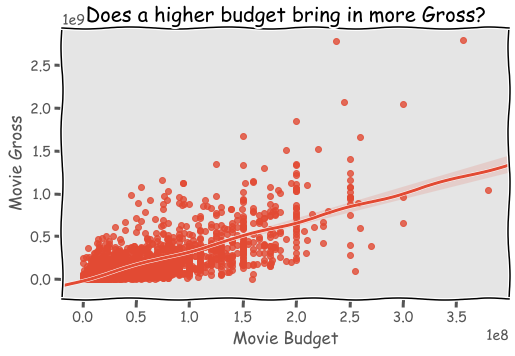

In [37]:
fig = plt.figure(figsize= (8,5))
sns.regplot(df1['budget'],df1['dom_gross'])
plt.xlabel('Movie Budget')
plt.ylabel('Movie Gross')
plt.title('Does a higher budget bring in more Gross?');

## Groupby Genre

In [41]:
#groupping dataset by month
#all numerical columns will have mean/avg calculated

groupedgenre = df1.groupby('genres').mean().reset_index()
groupedgenre

,genres,movie_id,budget,revenue,popularity,vote_avg,vote_count,runtime,dom_gross
0,Action,87448.550347,7.074278e+07,2.129044e+08,16.970071,6.281944,3128.250000,112.697917,2.129044e+08
1,Adventure,64954.222222,9.525181e+07,3.220438e+08,19.658498,6.554023,4069.348659,117.862069,3.220438e+08
2,Animation,77294.094737,8.733440e+07,3.375124e+08,20.499063,6.837895,4083.421053,94.442105,3.375124e+08
3,Comedy,57526.533217,3.098048e+07,9.755434e+07,12.536245,6.358916,1575.407343,103.951049,9.755434e+07
4,Crime,87688.837500,3.246135e+07,8.642738e+07,14.888481,6.851875,2147.606250,120.175000,8.642738e+07
5,Drama,78360.068111,2.901397e+07,8.239294e+07,13.643314,6.913313,1856.369969,120.586687,8.239294e+07
6,Family,49347.464286,7.662857e+07,2.750758e+08,14.543286,6.335714,2961.464286,96.535714,2.750758e+08
7,Fantasy,39353.097826,6.216848e+07,1.927479e+08,15.996533,6.371739,3009.152174,107.815217,1.927479e+08
8,History,85420.416667,5.208333e+07,1.791304e+08,14.522917,7.000000,2582.416667,142.500000,1.791304e+08
9,Horror,72603.712575,2.100262e+07,7.703329e+07,14.305491,6.102994,1718.652695,100.437126,7.703329e+07


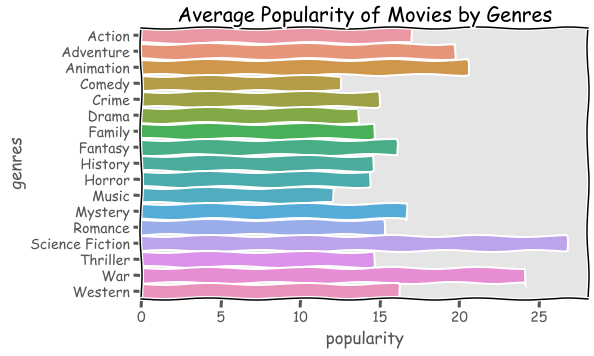

In [42]:
fig = plt.figure(figsize=(8,5))
sns.barplot(groupedgenre.popularity,groupedgenre.genres)

# for index, row in groupedgenre.iterrows():
#     c.text(row.name,row.popularity, round(row.popularity,2), color='black', ha="center")
    
plt.title('Average Popularity of Movies by Genres');

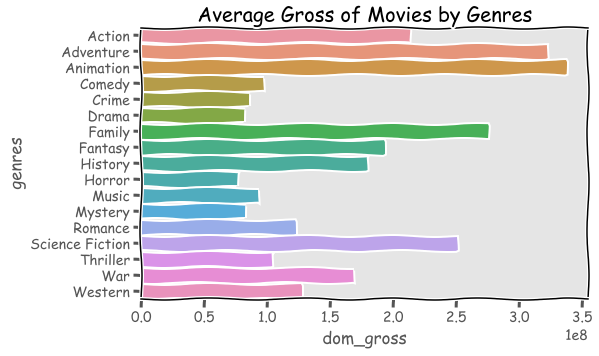

In [43]:
#dom_gross based on genres

fig = plt.figure(figsize=(8,5))
sns.barplot(groupedgenre.dom_gross,groupedgenre.genres)
  
plt.title('Average Gross of Movies by Genres');

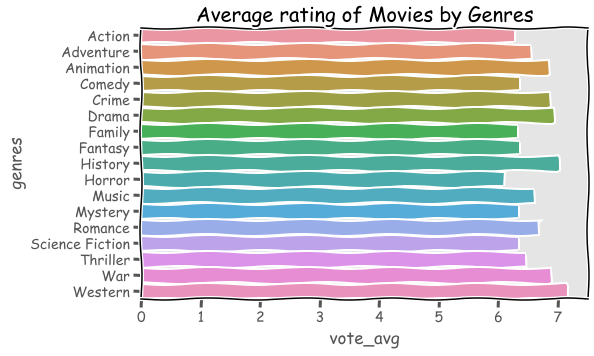

In [44]:
fig = plt.figure(figsize=(8,5))
sns.barplot(groupedgenre.vote_avg,groupedgenre.genres)
  
plt.title('Average rating of Movies by Genres');

## Groupby Month

In [38]:
#groupping dataset by month
#all numerical columns will have mean/avg calculated

groupedvalues = df1.groupby('release_month').mean().reset_index()
groupedvalues

,release_month,movie_id,budget,revenue,popularity,vote_avg,vote_count,runtime,dom_gross
0,01,77524.312500,3.092588e+07,7.619907e+07,13.495618,6.281944,1534.597222,105.847222,7.619907e+07
1,02,65935.429348,3.952516e+07,1.101759e+08,14.123277,6.434239,2147.510870,109.429348,1.101759e+08
2,03,67675.569507,4.830440e+07,1.374701e+08,14.650471,6.429148,2345.860987,109.914798,1.374701e+08
3,04,59238.398010,4.806352e+07,1.636731e+08,14.374960,6.339801,2382.323383,108.139303,1.636731e+08
4,05,73473.348739,6.825782e+07,2.323674e+08,16.781546,6.592017,3262.294118,114.924370,2.323674e+08
5,06,75831.819549,7.010395e+07,2.482388e+08,16.326398,6.398120,3106.552632,110.680451,2.482388e+08
6,07,65636.623574,5.648791e+07,1.830870e+08,15.899932,6.504563,2783.057034,112.045627,1.830870e+08
7,08,65909.243137,3.690536e+07,9.135103e+07,13.568494,6.313725,1637.854902,107.039216,9.135103e+07
8,09,66656.732308,2.848442e+07,7.318975e+07,15.237120,6.675385,1853.181538,110.643077,7.318975e+07
9,10,87157.533333,3.980135e+07,1.130151e+08,16.137174,6.648889,2448.792593,112.348148,1.130151e+08


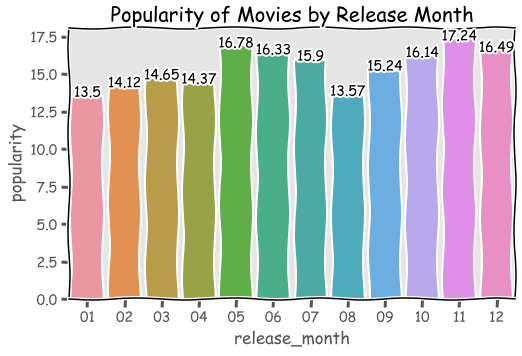

In [39]:
fig = plt.figure(figsize=(8,5))
a =  sns.barplot(groupedvalues.release_month,groupedvalues.popularity)

for index, row in groupedvalues.iterrows():
    a.text(row.name,row.popularity, round(row.popularity,2), color='black', ha="center")

plt.title('Popularity of Movies by Release Month');

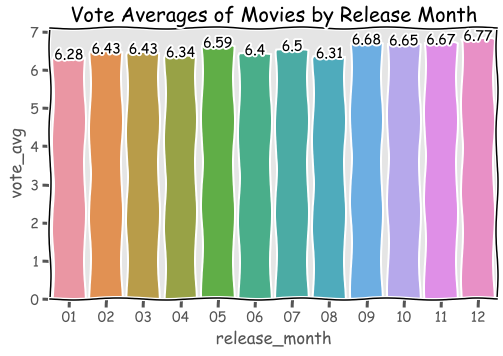

In [40]:
fig = plt.figure(figsize=(8,5))
b = sns.barplot(groupedvalues.release_month,groupedvalues.vote_avg)

for index, row in groupedvalues.iterrows():
    b.text(row.name,row.vote_avg, round(row.vote_avg,2), color='black', ha="center")
    
plt.title('Vote Averages of Movies by Release Month');

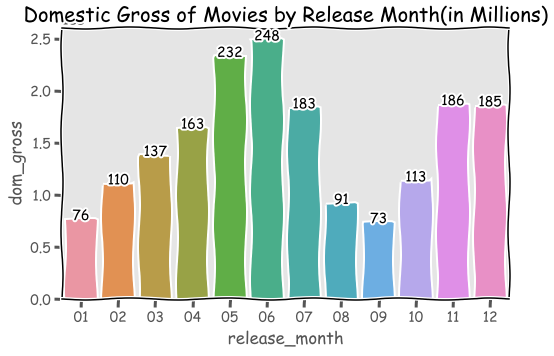

In [45]:
fig = plt.figure(figsize=(8,5))
c = sns.barplot(groupedvalues.release_month,groupedvalues.dom_gross)

for index, row in groupedvalues.iterrows():
    c.text(row.name,row.dom_gross, round(row.dom_gross//1000000), color='black', ha="center")
    
plt.title('Domestic Gross of Movies by Release Month(in Millions)');